In [ ]:
import pandas as pd
import numpy as np
from wordcloud_fa import WordCloudFa
from hazm import stopwords_list

In [ ]:
train =pd.read_csv("train.csv")
tec=(''.join(train[train['label']=='فناوری']['content']))
sport=(''.join(train[train['label']=='ورزشی']['content']))
health=(''.join(train[train['label']=='سلامت']['content']))
art=(''.join(train[train['label']=='فرهنگی/هنری']['content']))
politic=(''.join(train[train['label']=='سیاسی']['content']))
events=(''.join(train[train['label']=='حوادث']['content']))

In [ ]:
with open('stopword.txt', 'r',encoding="utf8") as file:
    stopword=[x.strip() for x in file.readlines()]

In [ ]:
#define a function for compute Number of words repetitions
def repetition(x):
    wordcloud = WordCloudFa(persian_normalize=True,include_numbers=False,collocations=False, width=800, height=400)
    t_d= wordcloud.process_text(x)
    #t_d1=t_d.copy()
    #pop stopwords
    t_d2=t_d.copy()
    for i in t_d.keys():
        if i in stopword:
            t_d2.pop(i)
    return t_d2

Stemming:

برای نرمالایز کردن کلمات به کار می روند به این صورت که کلمات را به ریشه ان کلمه تبدیل می کنند
از یک الگوریتم استفاده می کند که حروف انتهایی کلمات را حذف می کند بنابراین ممکن است بعضی از کلماتی که برمی گردادن بی معنی باشند
در عوض این روش سریع است و مناسب برای تحلیل نظرات یک وبسایت یا دسته بندی ایمیل های اسپم

lemmatization:

همانند بالا کلمات را به ریشه انان برمی گرداند با این تفاوت که به معنی دار بودن کلمه نیز توجه می کند و کلمات با معنی ای را برمی گرداند
سرعت ان نسبت به روش بالا کم است ولی دقت ببیشتری دارد و برای ساخت اپ های مربوط به زبان مناسب است


Text(0.5, 1.0, 'events')

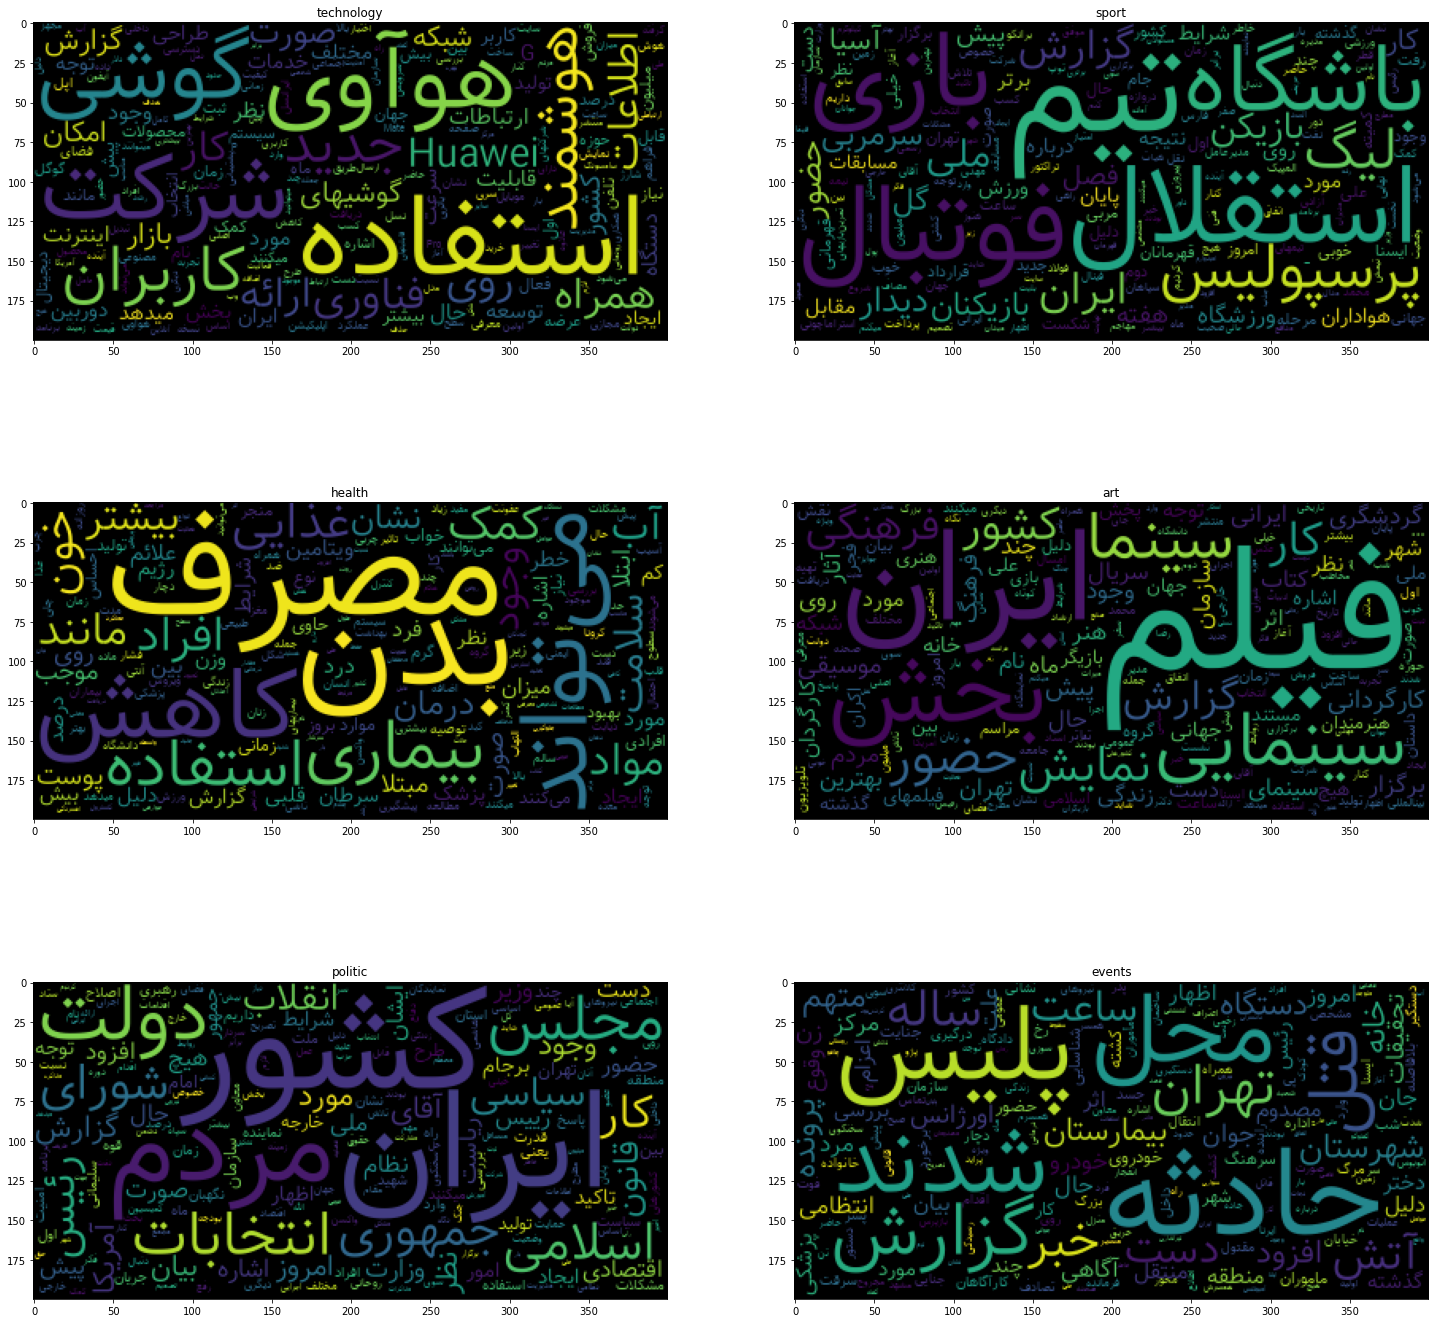

In [ ]:
#Get a dictionary for each class to show each word repetition in that class and plot a cloudword
import matplotlib.pyplot as plt
wordcloud = WordCloudFa()
tec1=repetition(tec)
tec_cloud = wordcloud.generate_from_frequencies(tec1)
f,axs=plt.subplots(3,2,figsize=(25,25))
axs[0,0].imshow(tec_cloud)
axs[0,0].set_title('technology')

sport1=repetition(sport)
sport1_cloud = wordcloud.generate_from_frequencies(sport1)
axs[0,1].imshow(sport1_cloud)
axs[0,1].set_title('sport')

health1=repetition(health)
health1_cloud= wordcloud.generate_from_frequencies(health1)
axs[1,0].imshow(health1_cloud)
axs[1,0].set_title('health')

art1=repetition(art)
art1_cloud = wordcloud.generate_from_frequencies(art1)
axs[1,1].imshow(art1_cloud)
axs[1,1].set_title('art')

politic1=repetition(politic)
politic1_cloud = wordcloud.generate_from_frequencies(politic1)
axs[2,0].imshow(politic1_cloud)
axs[2,0].set_title('politic')

events1=repetition(events)
events1_cloud = wordcloud.generate_from_frequencies(events1)
axs[2,1].imshow(events1_cloud)
axs[2,1].set_title('events')

likelihood:

به ازای یک کلاس مشخص احتمال وجود هر کلمه در ان کلاس چقدر است برای محاسبه ی ان تعداد هر کلمه را در ان کلاس تقسیم بر کل تعداد کلمات ان کلاس می کنیم

prior:

احتمال پیش امد هر کدام از دسته های خبری که در اینجا این احتمال را برای تمامی دسته های خبری یکسان و برابر 1/6 می گیریم

posterior:

به ازای مشخص بودن یک متن احتمال تعلق ان متن به هر کلاس چقدر است برای محاسبه ی ان احتمال وجود هر کلمه متن را در ان کلاس حساب می کنیم این احتملات و احتمال ان کلاس را در هم ضرب می کنیم

evidence:

likelihoodیک مجموعه داده شده از یکسری متن با کلاس  مشخص که برای محاسبه ی
استفاده می شوند

In [ ]:
test=pd.read_csv('test.csv')


In [ ]:
def classi(t):
    l=[[tec1,'فناوری'],[sport1,'ورزشی'],[health1,'سلامت'],[art1,'فرهنگی/هنری'],[politic1,'سیاسی'],[events1,'حوادث']]
    nor_dic=repetition(t)
    p={}
    pc=0
    for j in l:
        pc=0
        for w in nor_dic.keys():

            q=(j[0].get(w,0)) /sum(j[0].values())
            if q==0:
                pc=float('-inf')

                break
            else:
                pc=(nor_dic[w]*np.log(q))+pc


        p[float(pc)]=j[1]
        p[float('-inf')]='none'

    return p[max(p)]

In [ ]:
test['class']=test['content'].apply(lambda x: classi(x))



تیم استقلال قهرمان جام حذفی شد
استقلال اقتصادی کشور مهم است
در اینجا با درنظر گرفتن دو کلمه ی پشت سر هم معنی استقلال و در نتیجه احتمال تعلق ان به کلاس ورزشی و کلاس سیاسی تغییر می کند
استقلال می تواند دارای معانی متفاوت یک تیم ورزشی یا عدم وابستگی باشد که اگر ان را به عنوان یک تک کلمه به کار ببریم احتمال یکسانی در دو کلاس می گیرد در حالی که اگر با کلمه قبلی یا بعدی خود درنظر گرفته شود احتمال تعلقش متفاوت می شود
در اینجا درنظر گرفتن دو کلمه کافی است




وقتی می خواهیم احتمال کلاس رو برای متنی مشخص کنیم که دارای کلماتی هست که انها را قبلا در ان ندیده ایم این احتمال برای این کلمه صفر در نظر گرفته می شود و چون احتمالات در هم ضرب می شوند بدون توجه به کلمات دیگر احتمال تعلق این متن به این کلاس صفر می شود در حالی که ممکن کلمات دیگر احتمال زیادی داشته باشند

 Smoothing Additive:

 این روش به تمامی احتمالات تعلق هر کلمه به هر کلاس مقدار یک را اضافه می کند برای این که جمع احتمالات یک شود تعداد کلمات یکتا هر کلاس را به مخرج کسر اضافه می کنیم  با این کار دیگر احتمال کلمات جدید صفر نمی شود و یک مقدار کوچکی می گیرد  

![image.png](attachment:image.png)


In [ ]:
#classification with Additive Smoothing

def class_as(t):
    l=[[tec1,'فناوری'],[sport1,'ورزشی'],[health1,'سلامت'],[art1,'فرهنگی/هنری'],[politic1,'سیاسی'],[events1,'حوادث']]
    nor_dic=repetition(t)
    p={}
    pc=0
    for j in l:
        pc=0
        for w in nor_dic.keys():
            q=((j[0].get(w,0))+1) /(sum(j[0].values())+len(j[0].keys()))

            pc=(nor_dic[w]*np.log(q))+pc
        b=pc+np.log(1/6)

        p[b]=j[1]

    return p[max(p)]

In [ ]:
test2=pd.read_csv('test.csv')
test2['class']=test2['content'].apply(lambda x: class_as(x))


In [ ]:
import seaborn as sns
from operator import itemgetter
import arabic_reshaper
from bidi.algorithm import get_display
import matplotlib.pyplot as plt

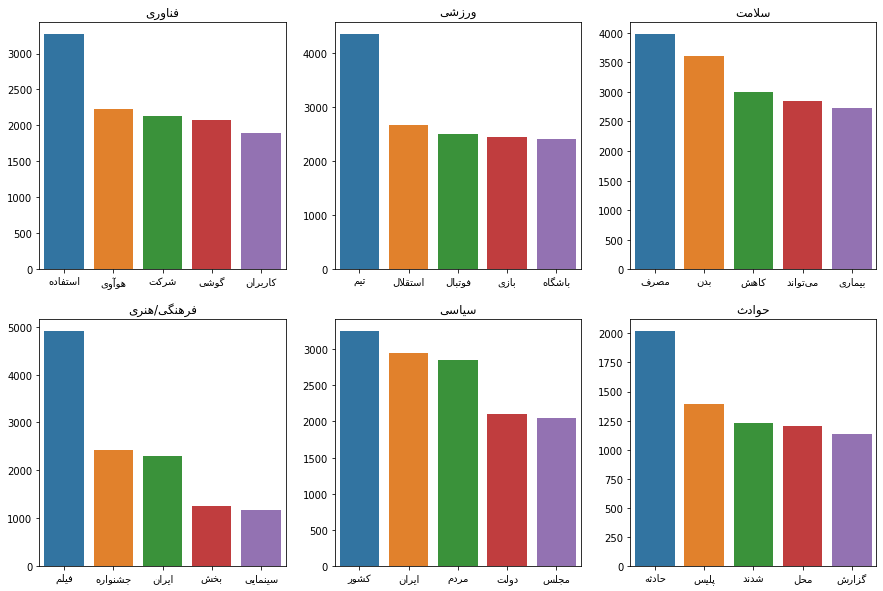

In [ ]:

fig, ax = plt.subplots(2, 3, figsize=(15, 10))
ax = ax.flatten()
l=[[tec1,'فناوری'],[sport1,'ورزشی'],[health1,'سلامت'],[art1,'فرهنگی/هنری'],[politic1,'سیاسی'],[events1,'حوادث']]
j=0
for i in l:
    more=dict(sorted(i[0].items(), key = itemgetter(1), reverse = True)[:5])

    keys = list(more.keys())
    vals = list(more.values())
    att = [ ]
    #attach farsi words
    for item in keys:
        att.append(get_display(arabic_reshaper.reshape(item)))
    #plot
    i[1]=get_display(arabic_reshaper.reshape(i[1]))
    sns.barplot(ax=ax[j],x=att, y=vals)
    ax[j].set_title(i[1])
    j=j+1



recall:

معیاری است که دقت ما را بر اساس تعداد اشتباهات درنظر نگرفتن مقادیر مربوط به یک کلاس برای ان کلاس ارزیابی می کند با توجه به این موضوع اگر احتمال تعلق همه ی مقادیر رو به کلاس برابر یک بگیریم این معیار ارزیابی مدل را بسیار خوب بیان می کند در حالی که این مدل عملا توانایی کلاس بندی و تمایز مقادیر مر بوطه را ندارد
مثلا اگر برای تمامی اخبار برچسب ورزشی بزنیم این مدل مقدار یک را برمی گرداند در حالی که می دانیم تمام اخبار ورزشی نیستند

precision:

معیاری است که مدل ما را بر اساس تعداد اشتباهات درنظر گرفتن مقادیر نامربوط به یک کلاس ارزیابی می کند با توجه به این موضوع اگر احتمال تعلق همه ی مقادیر رو به کلاس برابر صفر بگیریم این معیار ارزیابی مدل را بسیار خوب بیان می کند در حالی که این مدل عملا توانایی کلاس بندی و تمایز مقادیر مربوطه را ندارد
با افزایش مقدار هر کدام از دو تابع بالا مقدار دیگری کاهش می یابد و برای برقراری یک تعادل بین انها به یک عامل ارزیابی دیگر که دو مدل بالا را ادغام می کند نیاز داریم
مثلا اگر برای هیچ کدام از اخبار برچشب ورزشی را در نظر نگیریم ارزیابی این مدل برای دسته ی ورزشی یک می شود در حالی که درست نیست


از میانگین هارمونیک استفاده می کند از میانگین معمولی استفاده نمی کنیم زیرا اگر مقادیر دو معیار بالا صفر و یک شود میانگین معمولی
مقدار نیم را برمی گرداند در حالی که میانگین هارمونیک مقدار صفر را برمی گرداند این میانگین در واقع ارزیابی تعادل بین دو عامل
بالا است که بهینگی هردو عامل را شامل اهمیت یکسانی می داند البته با اضافه کردن یک ضریب به هر کدام از عوامل بالا می توان میزان اهمیت ان را بیشتر کرد



باید مقادیر معیارهایی که به ازای هر کلاس یک مقدار متفاوت دارند را تبدیل به یک مقدار برای تمامی کلاس ها کرد این کار از طریق سه روش پایین انجام می شود

macro:

compute simple mean between  f1 values of all classes

weighted:
  
compute weighted mean between  f1 values of all classes. The weight of each class assumed the number of samples in that class  


micro:
  
   
 تمام مقادیری را که به اشتباه جز یک کلاس فرض کردیم در تمام کلاس ها باهم جمع کنیم precission تمام کلاس ها را در کنار هم نگاه می کنیم ینعنی مثلا برای محاسبه ی مقدار
و سپس مقدارهر کدام از معیارها را محاسبه می کنیم       

micro-F1 = micro-precision = micro-recall = accuracy

In [ ]:
#𝐴𝑐𝑐𝑢𝑟𝑎𝑐𝑦 with out Additive Smoothing

correct=test[test['class']==test['label']]
Accurancy=(len(correct)/len(test))*100

#𝑃𝑟𝑒𝑐𝑖𝑠𝑖𝑜n with out Additive Smoothing
precision_tec=(len(correct[correct['class']=='فناوری'])/len(test[test['class']=='فناوری']))*100
precision_sport=(len(correct[correct['class']=='ورزشی'])/len(test[test['class']=='ورزشی']))*100
precision_health=(len(correct[correct['class']=='سلامت'])/len(test[test['class']=='سلامت']))*100
precision_art=(len(correct[correct['class']=='فرهنگی/هنری'])/len(test[test['class']=='فرهنگی/هنری']))*100
precision_pol=(len(correct[correct['class']=='سیاسی'])/len(test[test['class']=='سیاسی']))*100
precision_ev=(len(correct[correct['class']=='حوادث'])/len(test[test['class']=='حوادث']))*100

#recall with out Additive Smoothing
recall_tec=(len(correct[correct['class']=='فناوری'])/len(test[test['label']=='فناوری']))*100
recall_sport=(len(correct[correct['class']=='ورزشی'])/len(test[test['label']=='ورزشی']))*100
recall_health=(len(correct[correct['class']=='سلامت'])/len(test[test['label']=='سلامت']))*100
recall_art=(len(correct[correct['class']=='فرهنگی/هنری'])/len(test[test['label']=='فرهنگی/هنری']))*100
recall_pol=(len(correct[correct['class']=='سیاسی'])/len(test[test['label']=='سیاسی']))*100
recall_ev=(len(correct[correct['class']=='حوادث'])/len(test[test['label']=='حوادث']))*100

#f1 with out Additive Smoothing
f1_tec=2*(precision_tec*recall_tec)/(precision_tec+recall_tec)
f1_sport=2*(precision_sport*recall_sport)/(precision_sport+recall_sport)
f1_health=2*(precision_health*recall_health)/(precision_health+recall_health)
f1_art=2*(precision_art*recall_art)/(precision_art+recall_art)
f1_pol=2*(precision_pol*recall_pol)/(precision_pol+recall_pol)
f1_ev=2*(precision_ev*recall_ev)/(precision_ev+recall_ev)

In [ ]:
#𝐴𝑐𝑐𝑢𝑟𝑎𝑐𝑦 with Additive Smoothing

correct2=test2[test2['class']==test2['label']]
Accurancy2=(len(correct2)/len(test2))*100

#𝑃𝑟𝑒𝑐𝑖𝑠𝑖𝑜n with Additive Smoothing
precisionAS_tec=(len(correct2[correct2['class']=='فناوری'])/len(test2[test2['class']=='فناوری']))*100
precisionAS_sport=(len(correct2[correct2['class']=='ورزشی'])/len(test2[test2['class']=='ورزشی']))*100
precisionAS_health=(len(correct2[correct2['class']=='سلامت'])/len(test2[test2['class']=='سلامت']))*100
precisionAS_art=(len(correct2[correct2['class']=='فرهنگی/هنری'])/len(test2[test2['class']=='فرهنگی/هنری']))*100
precisionAS_pol=(len(correct2[correct2['class']=='سیاسی'])/len(test2[test2['class']=='سیاسی']))*100
precisionAS_ev=(len(correct2[correct2['class']=='حوادث'])/len(test2[test2['class']=='حوادث']))*100

#recall with Additive Smoothing
recallAS_tec=(len(correct2[correct2['class']=='فناوری'])/len(test2[test2['label']=='فناوری']))*100
recallAS_sport=(len(correct2[correct2['class']=='ورزشی'])/len(test2[test2['label']=='ورزشی']))*100
recallAS_health=(len(correct2[correct2['class']=='سلامت'])/len(test2[test2['label']=='سلامت']))*100
recallAS_art=(len(correct2[correct2['class']=='فرهنگی/هنری'])/len(test2[test2['label']=='فرهنگی/هنری']))*100
recallAS_pol=(len(correct2[correct2['class']=='سیاسی'])/len(test2[test2['label']=='سیاسی']))*100
recallAS_ev=(len(correct2[correct2['class']=='حوادث'])/len(test2[test2['label']=='حوادث']))*100

#f1 with out Additive Smoothing
f1AS_tec=2*(precisionAS_tec*recallAS_tec)/(precisionAS_tec+recallAS_tec)
f1AS_sport=2*(precisionAS_sport*recallAS_sport)/(precisionAS_sport+recallAS_sport)
f1AS_health=2*(precisionAS_health*recallAS_health)/(precisionAS_health+recallAS_health)
f1AS_art=2*(precisionAS_art*recallAS_art)/(precisionAS_art+recallAS_art)
f1AS_pol=2*(precisionAS_pol*recallAS_pol)/(precisionAS_pol+recallAS_pol)
f1AS_ev=2*(precisionAS_ev*recallAS_ev)/(precisionAS_ev+recallAS_ev)

In [ ]:
#macro with out Additive Smoothing
macro=(f1_tec+f1_sport+f1_health+f1_art+f1_pol+f1_ev)/6
#macro with Additive Smoothing
macro2=(f1AS_tec+f1AS_sport+f1AS_health+f1AS_art+f1AS_pol+f1AS_ev)/6

#weighted with out Additive Smoothing
weighted=(f1_tec*len(test[test['label']=='فناوری'])/len(test))+(f1_sport*len(test[test['label']=='ورزشی'])/len(test))+(f1_health*len(test[test['label']=='سلامت'])/len(test))+(f1_art*len(test[test['label']=='فرهنگی/هنری'])/len(test))+(f1_pol*len(test[test['label']=='سیاسی'])/len(test))+(f1_ev*len(test[test['label']=='حوادث'])/len(test))
#weighted with Additive Smoothing
weighted2=(f1AS_tec*len(test2[test2['label']=='فناوری'])/len(test2))+(f1AS_sport*len(test2[test2['label']=='ورزشی'])/len(test2))+(f1AS_health*len(test2[test2['label']=='سلامت'])/len(test2))+(f1AS_art*len(test2[test2['label']=='فرهنگی/هنری'])/len(test2))+(f1AS_pol*len(test2[test2['label']=='سیاسی'])/len(test2))+(f1AS_ev*len(test2[test2['label']=='حوادث'])/len(test2))

#micro with out Additive Smoothing by precisions
micro=len(correct)/len(test['class'])*100
#micro with Additive Smoothing by precisions
micro2=len(correct2)/len(test2['class'])*100




|with smoothing  | Technology | Sports | Health | Art  | Political| Accidents | All Classes |
| -----------    | -----------| -------| -------|------| -------- |  -------- |  ---------- |
| Precision      |    95.75   | 98.9   | 98.2   | 96.9 |  87.6    | 90.2      |-------      |
| Recall         | 94.04      | 96.8   | 93.2   | 87.2 |  96      | 97        | -------     |
| F1-score       | 94.8       | 97.8   | 95.6   | 91.8 | 91.6     | 93.4      | -------     |
| Accuracy       | -----------| ------ | ------ | ---- | -------- | -------   | 94.17       |
| Macro Avg      | ------     | ------ | ------ | ---- |---- ---- | -------   | 94.22       |
| Micro Avg      | -----------| ------ | ------ |----  | -------- | -------   | 94.1        |
| Weighted Avg   | ------     | ------ | ------ | ---- | ---- ----| -------   |94.19        |

|with out smoothing | Technology | Sports | Health | Art  | Political| Accidents | All Classes |
| -----------       | -----------| -------| -------|------| -------- |  -------- |  ---------- |
| Precision         |    71.42   | 97.14  | 95.45  | 82.05|  86      | 83.3      |-------      |
| Recall            |    5.9     | 17.8   | 11.8   | 18.3 |  21.5    | 12.5      | -------     |
| F1-score          |   10.98    | 30.22  | 21.1   | 30   | 34.4     | 21.73     | -------     |
| Accuracy          | -----------| ------ | ------ | ---- | -------- | -------   | 14.88       |
| Macro Avg         | ------     | ------ | ------ | ---- |---- ---- | -------   | 24.74       |
| Micro Avg         | -----------| ------ | ------ |----  | -------- | -------   | 14.88       |
| Weighted Avg      | ------     | ------ | ------ | ---- | ---- ----| -------   |25.06        |

به طور کلی موجب افزایش قابل توجه مقدار تمامی معیارها شده است active smoothing
 بیشترین مقدار خطا مربوط به خبرهایی می شود که فرهنگی/هنری بوده اند ولی در دسته ی سیاسی کلاس بندی شده اند که همین مورد روی مقادیر
  برای دسته سیاسی تاثیر گذاشته و باعث کم شدن این مقادیر شده Precision برای دسته ی هنری و Recall

تنها معیاری است که در جدول دوم مقادیری قابل قبول به دست اورده دلیل ان این است که در این معیار فقط به کلاس هایی توسط مدل لیبل Precision
خورده اند توجه می شود و اخباری که مدل موفق به کلاس بندی ان ها نشده است را نادیده می گیرد


In [ ]:
w=test2[(test2['label']=='فرهنگی/هنری') &((test2['class']=='سیاسی'))].reset_index(drop=True)

In [ ]:
print(w['content'].loc[1])

اعتراض گسترده کاربران توییتر به اظهارات وزیر امورخارجه آمریکا هشتگ انگلیسی پرشین گلف (خلیج فارس) را در توییتر ترند کرد. به گزارش خبرآنلاین، رکس تیلرسون وزیر امورخارجه آمریکا در اظهارات اخیرش با به کار بردن واژه‌ای مجعول به جای خلیج فارس موجی از اعتراضات را در شبکه‌های اجتماعی برانگیخت. بسیاری از کاربران شبکه‌های اجتماعی به ویژه توییتر برای اعتراض به این موضوع از هشتگ انگلیسی «PersianGulf» استفاده کردند. همین موضوع سبب شد که این هشتگ مدتی در توییتر ترند شود.


In [ ]:
print(w['content'].loc[3])

شبکه اجتماعی اینستاگرام با وجود گذر دو سال از شهادت سردار سلیمانی همچنان عکس و پست‌های مربوط به این سردار را برنمی‌تابد و در تازه‌ترین اقدام با توجه به انتشار پستی درباره سردار دل ها، صفحه وزیر فرهنگ را نیز حذف کرد.


In [ ]:
print(w['content'].loc[4])

هر جامعه‌ای که رشد کرده و جلو افتاده، به دلیل کار است و کار و کار فرهنگی را نباید لحظه‌ای تعطیل کرد.


In [ ]:
print(w['content'].loc[5])

پیش نویس خواهر خواندگی شهرهای صعده یمن و دزفول ایران امضا شد.   به گزارش مهر، ابراهیم الدیلمی سفیر یمن در ایران ظهر امروز در مراسم تبادل مدارک خواهر خواندگی شهرهای صعده یمن و دزفول که در تالار اجتماعات آیت الله قاضی دانشگاه صنعتی جندی شاپور دزفول برگزار شد، گفت: در حقیقت شهرهای صعده و دزفول دارای مشترکات زیادی هستند.   وی با اشاره به مقاومت مردم دزفول در دوران دفاع مقدس افزود: افتخار می‌کنیم با همچنین شهری در جمهوری اسلامی ایران تبادل همکاری می‌کنیم.   سفیر یمن در کشورمان با تاکید بر اینکه مقاومت در برابر دشمنان از ویژگی‌های شهرهای دزفول و صعده است، ادامه داد: از دیگر مشترکان این دو شهر وجود آثار تاریخی و بازار قدیم و صنایع دستی است.   الدیلمی بیان کرد: با توافق مسئولان دو کشور امروز سند خواهر خوانندگی شهرهای صعده و دزفول تبادل شد.


In [ ]:

print(w['content'].loc[11])
# :(

بودجه صداوسیما صرف پرسنل می‌شود نه تولید! رسانه جمعی با دست خالی نمی‌تواند جلوی فضای مجازی بایستد



    می توانست کمک بسیاری به کلاس بندی بکند و این مورد را می توان در کلمه کار فرهنگی دید  Bigramsاستفاده از
    در نظر گرفتن یک ضریب جریمه برای کلمات یکسانی که تعداد بار زیادی در کلاس های مختلف تکرار شده اند
    از دیگر کارهای بهبود مدل می توان به در نظر گرفتن یک ضریب خطا برای لیبل بندی خبرهای فرهنگی توسط وبسایت های خبری جمهوری عسلامی اشاره کرد